In [242]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook

# **Plotting Sigmoid Neuron**

In [91]:
def sigmoid(w, x, b):
    return 1 / (1 + np.exp(-(w * x + b)))

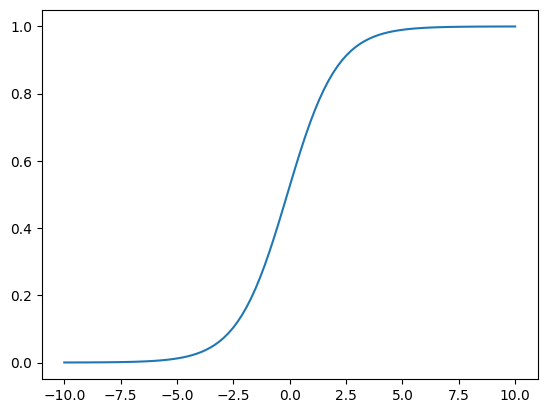

In [92]:
w = 0.9
b = 0.1
X = np.linspace(-10, 10, 100)
Y = sigmoid(w, X, b)
plt.plot(X,Y)
plt.show()

In [93]:
def sigmoid2d(w1, w2, b, x1, x2):
    return (1/(1 + np.exp(-( w1 * x1 + w2 * x2 + b))))

In [94]:
sigmoid2d(0.5, 0, 0, 1, 0)

0.6224593312018546

In [95]:
from mpl_toolkits import mplot3d

In [96]:
X1 = np.linspace(-10,10,100)
X2 = np.linspace(-10,10,100)
XX1, XX2 = np.meshgrid(X1, X2)
print(XX1.shape, XX2.shape)

(100, 100) (100, 100)


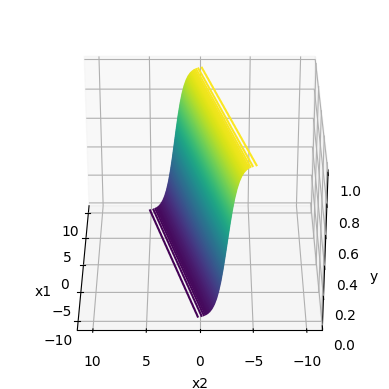

In [97]:
w1 = 0.5
w2 = -2
b = 0
Y = sigmoid2d(w1, w2, b, XX1, XX2)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(XX1, XX2, Y, 200, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.view_init(30, 180)


In [98]:
cmap = colors.LinearSegmentedColormap.from_list("", colors = ["red", "yellow", "green"])

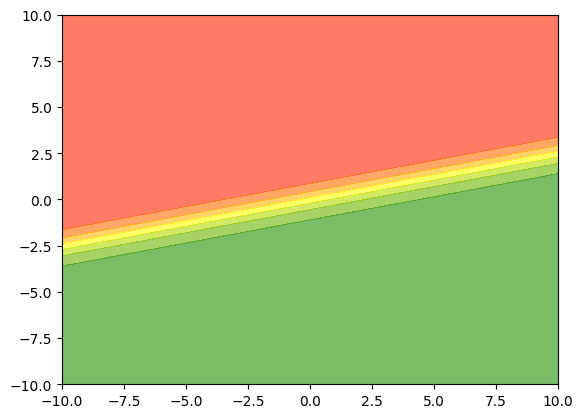

In [99]:
plt.contourf(XX1,XX2,Y, cmap = cmap, alpha = 0.6)
plt.show()

# **Loss for a Dataset**

In [100]:
w_unknown = 0.5
b_unknown = 0.25
X = np.random.random(25) * 20 - 10  # gives random numbers between -20 and 20 and avg at 0
Y = sigmoid(w_unknown,X,b_unknown)

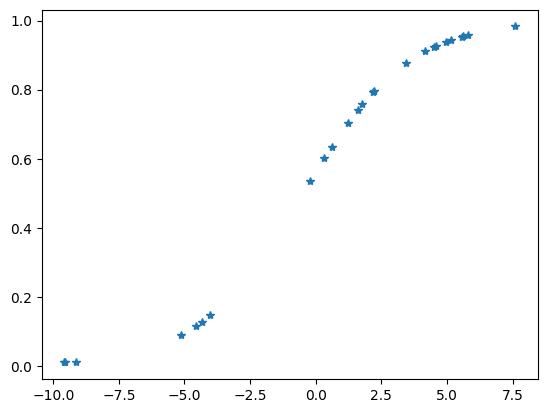

In [101]:
plt.plot(X,Y,"*")
plt.show()

In [102]:
def calculate_loss(w_est,b_est,X,Y):
    loss = 0
    for x,y in zip(X,Y):
        loss += (y - sigmoid(w_est,x,b_est))**2
    return loss

In [103]:
W = np.linspace(-1,1,100)
B = np.linspace(-1,1,100)
WW , BB = np.meshgrid(W,B)
Loss = np.zeros(WW.shape)

In [104]:
print(WW.shape, BB.shape)

(100, 100) (100, 100)


In [105]:
for i in range(WW.shape[0]):
    for j in range(WW.shape[0]):
        Loss[i, j] = calculate_loss(WW[i, j],BB[i, j], X, Y)

Text(0.5, 0, 'Loss')

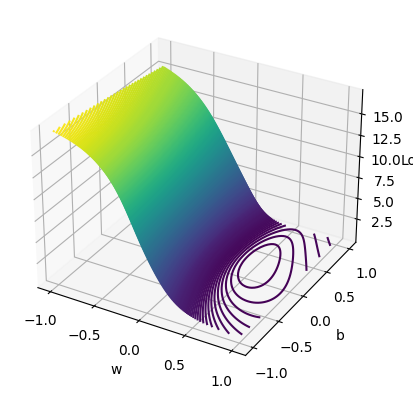

In [106]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(WW, BB, Loss, 300, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')
#ax.view_init(30, 180)

In [107]:
ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i*(Loss.shape[1]))

In [108]:
print(i,j)

62 74


In [109]:
print(WW[i, j], BB[i, j])

0.49494949494949503 0.2525252525252526


# **Class for Sigmoid Neuron**

In [234]:
class SigmoidNeuron:
    def __init__(self):
        self.w = None
        self.b = None
    def perceptron(self,x):
        return np.dot(x,self.w.T) + self.b
    def sigmoid(self,x):
        return 1.0 / (1.0 + np.exp(-x))
    def grad_w(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred) * x
    def grad_b(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred)
    def predict(self, X):
        Y = []
        for x in X:
            y_pred = self.sigmoid(self.perceptron(x))
            Y.append(y_pred)
        return np.array(Y)
    def fit( self,X, Y, epochs=1, lr = 1, initialise = True, display_loss = False):
        if initialise:
            self.w = np.random.randn(1, X.shape[1])
            self.b = 0
        if display_loss:
            loss = {}
        for i in tqdm_notebook(range(epochs), total = epochs, unit="epoch"):
            dw = 0
            db = 0
            for x,y in zip(X,Y):
                dw += self.grad_w(x, y)
                db += self.grad_b(x, y)
            self.w -= lr * dw
            self.b -= lr * db
            if display_loss:
                Y_pred = self.sigmoid(self.perceptron(X))
                loss[i] = mean_squared_error(Y_pred, Y)
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Error')
            plt.show()

# **Fit for Toy Dataset**

In [169]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = [1, 1, 1, 0, 0, 0]
print(X.shape)
print(X[0].shape)

(6, 2)
(2,)


In [170]:
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.25, True)

In [171]:
for i in range(20):
    print(sn.w,sn.b)
    sn.fit(X, Y, 1, 0.5, False)

[[ 0.53831089 -0.41789461]] [0.0077341]
[[ 0.83122182 -0.08303847]] [-0.02560661]
[[ 0.84373287 -0.4474786 ]] [-0.08533849]
[[ 1.0353853  -0.20266291]] [-0.13093715]
[[ 1.03674709 -0.45682504]] [-0.18944093]
[[ 1.16589536 -0.30453736]] [-0.23035708]
[[ 1.1819248  -0.44361708]] [-0.27650115]
[[ 1.25891564 -0.38585783]] [-0.31090747]
[[ 1.29083885 -0.43910688]] [-0.34595427]
[[ 1.33849487 -0.43522329]] [-0.375892]
[[ 1.37462711 -0.45393025]] [-0.40444413]
[[ 1.41097422 -0.46356426]] [-0.43061573]
[[ 1.44414876 -0.47476932]] [-0.45509942]
[[ 1.47543869 -0.48478914]] [-0.4779705]
[[ 1.50486047 -0.49430168]] [-0.49942644]
[[ 1.53264356 -0.50327407]] [-0.51960944]
[[ 1.55895056 -0.51177068]] [-0.53864666]
[[ 1.58392463 -0.51983705]] [-0.55664806]
[[ 1.60768932 -0.52751315]] [-0.57370955]
[[ 1.63035216 -0.53483376]] [-0.58991512]


In [172]:
def plot_sn(X, Y, sn, ax):
    X1 = np.linspace(-10, 10, 100)
    X2 = np.linspace(-10, 10, 100)
    XX1, XX2 = np.meshgrid(X1, X2)
    YY = np.zeros(XX1.shape)
    for x in range(X2.size):
        for y in range(X1.size):
            val = np.asarray([X1[y],X2[x]])
            YY[x, y] = sn.sigmoid(sn.perceptron(val))
    ax.contourf(XX1, XX2, YY, cmap = cmap, alpha = 0.7)
    ax.scatter(X[:,0],X[:,1],c=Y,cmap = cmap)
    ax.plot()

[[-0.97087554 -0.45304325]] [0.05043821]
[[-0.71986417 -0.56001375]] [0.06328263]
[[-0.30203012 -0.632724  ]] [0.06145265]
[[ 0.32887304 -0.63986908]] [0.09075661]
[[ 0.66014576 -0.29981995]] [0.11351918]
[[ 0.83673048 -0.19737623]] [0.04473403]
[[ 0.88615402 -0.38277941]] [-0.02601007]
[[ 1.02355073 -0.25841674]] [-0.0816761]
[[ 1.04926379 -0.42097362]] [-0.14094141]
[[ 1.1538468  -0.32722173]] [-0.18671258]


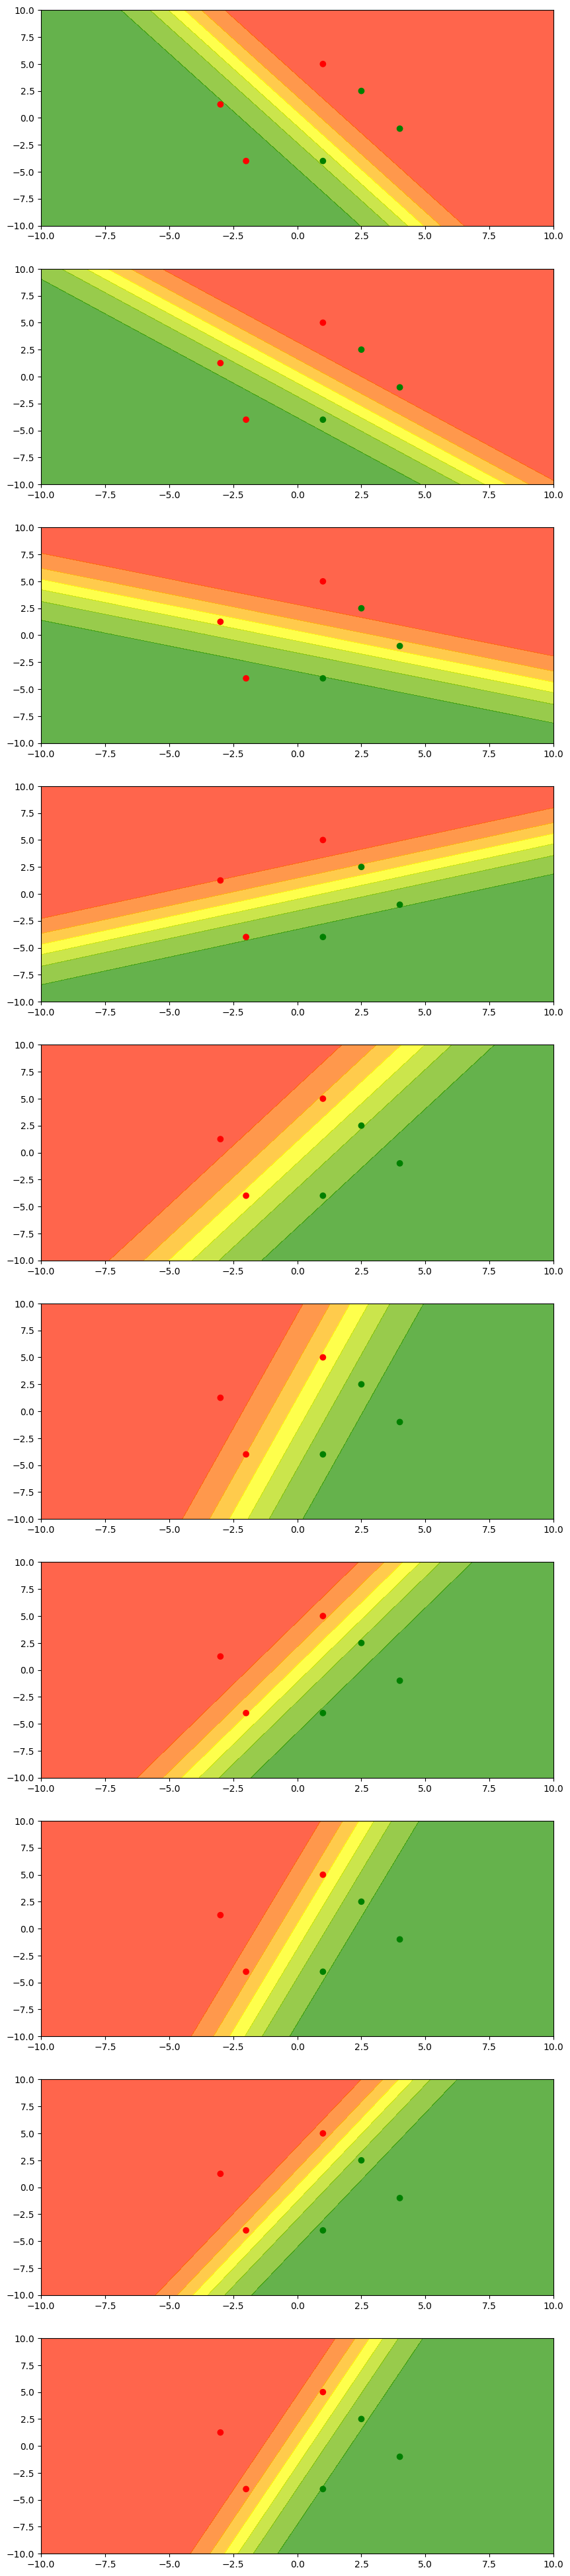

In [174]:
sn.fit(X, Y, 1, 0.5, True)
N = 10
plt.figure(figsize =(10, N*5))
for i in range(N):
    print(sn.w, sn.b)
    ax = plt.subplot(N, 1, i+1)
    plot_sn(X, Y, sn, ax)
    sn.fit(X, Y, 1, 0.5, False)

# **Loading Data**

In [175]:
data = pd.read_csv("mobile_cleaned.csv")

In [176]:
data.head()

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,...,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
0,0,12,55,155.0,250,1.3,10.5,5,2.00,0,...,4,2,3,67.8,64.0,5,3,2000,125,1
1,0,1,55,132.0,300,1.3,10.6,5,0.30,1,...,4,4,6,64.0,32.0,5,3,2000,165,1
2,0,9,55,142.0,329,1.5,8.5,5,2.00,3,...,4,9,6,72.0,32.0,6,3,2500,164,0
3,0,8,55,152.0,385,1.3,8.0,5,2.00,3,...,4,1,3,75.1,32.0,6,3,3000,165,1
4,1,1,55,234.0,385,1.3,7.9,5,1.92,3,...,4,1,6,91.0,32.0,6,3,3000,165,0


In [177]:
data.shape

(109, 40)

In [178]:
X = data.drop("is_liked", axis = 1)

In [179]:
Y = data["is_liked"]

In [180]:
Y.head()

0    1
1    1
2    0
3    1
4    0
Name: is_liked, dtype: int64

# **Standardisation**

In [181]:
from sklearn.preprocessing import StandardScaler

In [182]:
scalar = StandardScaler()

In [183]:
R = np.random.random([100, 1])

In [184]:
print(R.mean() , R.std())

0.5059484235694603 0.29171341107010995


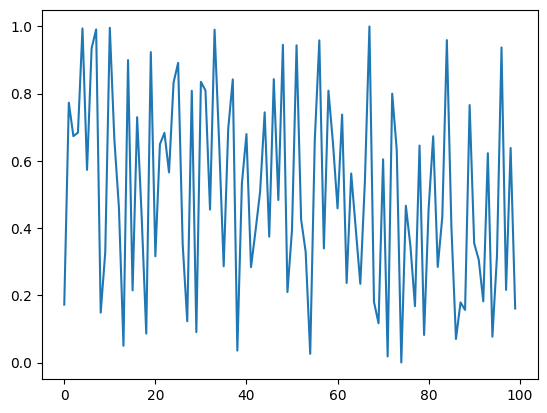

In [185]:
plt.plot(R)
plt.show()

In [186]:
scalar.fit(R)

StandardScaler()

In [187]:
scalar.mean_

array([0.50594842])

In [188]:
RT = scalar.transform(R)

In [189]:
RT.mean()

-8.43769498715119e-17

In [190]:
RT.std()

1.0

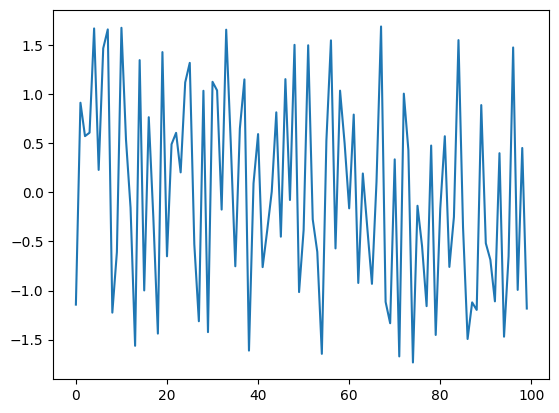

In [191]:
plt.plot(RT)
plt.show()

In [192]:
from sklearn.model_selection import train_test_split

In [193]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, stratify = Y)

In [194]:
print(X_train.shape, X_test.shape)

(81, 39) (28, 39)


In [195]:
""" 1) First standardize train data by computing mean, std. Use these parameters
(mean and std) to standardise test data this is the reason why scalar has to 
functions fit and transform. 
2) fit the train data to scalar and use the same scalar to standardise test data"""

' 1) First standardize train data by computing mean, std. Use these parameters\n(mean and std) to standardise test data this is the reason why scalar has to \nfunctions fit and transform. \n2) fit the train data to scalar and use the same scalar to standardise test data'

In [196]:
X_scaled_train = scalar.fit_transform(X_train)
X_scaled_test = scalar.transform(X_test)

In [214]:
Y_train = Y_train.ravel() # flattening y
Y_test = Y_test.ravel()

# **Train on Data**

C:\Users\Admin\AppData\Local\Temp\ipykernel_18332\2707683505.py:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total = epochs, unit="epoch"):


  0%|          | 0/450 [00:00<?, ?epoch/s]

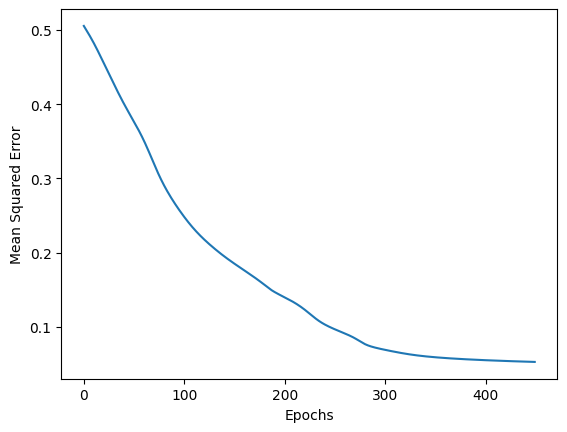

In [235]:
sn = SigmoidNeuron()
sn.fit(X_scaled_train, Y_train, epochs = 450, lr = 0.01, display_loss = True)

In [236]:
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)

In [237]:
scaled_threshold = 0.5

In [238]:
Y_pred_binerised_train = (Y_pred_train > scaled_threshold).astype("int").ravel()
Y_pred_binerised_test = (Y_pred_test > scaled_threshold).astype("int").ravel()

In [239]:
accuracy_train = accuracy_score(Y_pred_binerised_train, Y_train)
accuracy_test = accuracy_score(Y_pred_binerised_test, Y_test)

In [240]:
print(accuracy_train, accuracy_test)

0.9629629629629629 0.75
